In [1]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 2: Load and explore the data
data = pd.read_csv(r"C:\Users\Balu\Desktop\Python learning\datascienceintern\temp\Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
print(data.head())  # Display the first few rows of the dataset
print("_______________________________________________________________________________________________________________________")
print(data.shape)  # Print the dimensions of the dataset

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
_______________________________________________________________________________________________________________________
(200, 5)


In [5]:
# Step 3: Data Preprocessing
# Remove any unnecessary columns
data = data.drop('CustomerID', axis=1)

In [6]:
print(data)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [7]:
# Encode categorical variable 'Gender' into numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
print(data)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]


In [8]:
# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

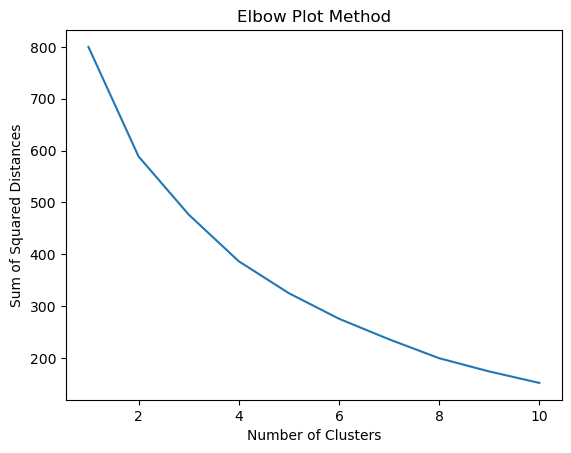

In [9]:
# Step 4: Choose the number of clusters
# Use an elbow plot to determine the optimal number of clusters

# Calculate the sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.title('Elbow Plot Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
num_clusters = 5  # Let's assume we choose 5 clusters

In [ ]:
# Step 5: Apply the K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

In [11]:
# Step 6: Obtain cluster labels for each data point
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 1 2 0 2 0 2 0 3 0 3 0 2 0 3 1 2 1 3 0 3 1 2 1 2 1 2 1 2 0 3 0 3 1 2 0 2
 0 2 0 2 1 3 0 2 0 2 0 0 2 2 1 0 3 2 3 2 3 0 3 3 1 2 2 3 1 2 2 1 0 3 2 2 2
 3 1 2 3 0 2 3 1 3 2 0 3 2 0 0 2 2 1 3 2 0 1 2 0 3 1 0 2 3 1 3 0 2 3 3 3 3
 0 2 1 0 0 2 2 2 2 1 2 0 1 0 0 3 1 3 1 4 1 0 0 4 0 4 1 4 0 4 1 0 0 4 1 3 0
 4 1 4 1 4 0 4 0 4 0 4 0 2 0 4 0 4 0 4 0 4 1 4 1 4 1 4 0 4 1 4 1 4 0 4 0 4
 1 4 1 4 0 4 0 4 0 4 0 4 1 4 1]


In [13]:
# Step 7: Evaluate the clustering results

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_data, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_data, cluster_labels)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.31709067955763137
Calinski-Harabasz Index: 71.20940444952667
Davies-Bouldin Index: 1.150598753335643


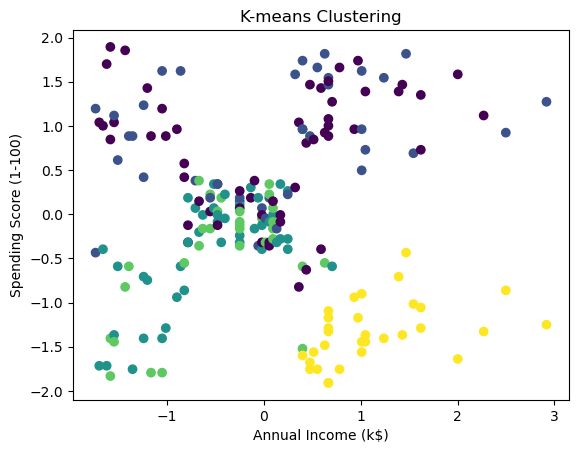

In [14]:
# Step 8: Interpret and visualize the clusters
# Create a scatter plot of the data points with different colors representing the clusters
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
# Step 9: Explore cluster characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=data.columns)
print(" Explored cluster characteristics:")
print(cluster_df)

 Explored cluster characteristics:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000  28.345455           60.800000               68.654545
1  0.000000  28.250000           62.000000               71.675000
2  1.000000  48.720930           46.186047               39.674419
3  0.000000  55.903226           48.774194               38.806452
4  0.451613  40.419355           90.000000               15.741935


In [16]:
# Step 10: Assign cluster labels to original data
data['Cluster'] = cluster_labels
print("Assigned cluster labels to the original data.")
print("Updated data with cluster labels:")
print(data.head())

Assigned cluster labels to the original data.
Updated data with cluster labels:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        1
1       0   21                  15                      81        1
2       1   20                  16                       6        2
3       1   23                  16                      77        0
4       1   31                  17                      40        2


In [17]:
# Step 11: Analyze cluster profiles
cluster_profiles = data.groupby('Cluster').mean()
print("Analyzed cluster profiles:")
print(cluster_profiles)

Analyzed cluster profiles:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  28.345455           60.800000               68.654545
1        0.000000  28.250000           62.000000               71.675000
2        1.000000  48.720930           46.186047               39.674419
3        0.000000  55.903226           48.774194               38.806452
4        0.451613  40.419355           90.000000               15.741935


Cluster 1 statistics:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    40.0  40.000000           40.000000               40.000000     40.0
mean      0.0  28.250000           62.000000               71.675000      1.0
std       0.0   6.975231           29.117798               16.727664      0.0
min       0.0  18.000000           15.000000               39.000000      1.0
25%       0.0  21.750000           41.000000               58.250000      1.0
50%       0.0  28.000000           63.000000               73.000000      1.0
75%       0.0  33.250000           78.000000               88.500000      1.0
max       0.0  40.000000          137.000000               97.000000      1.0


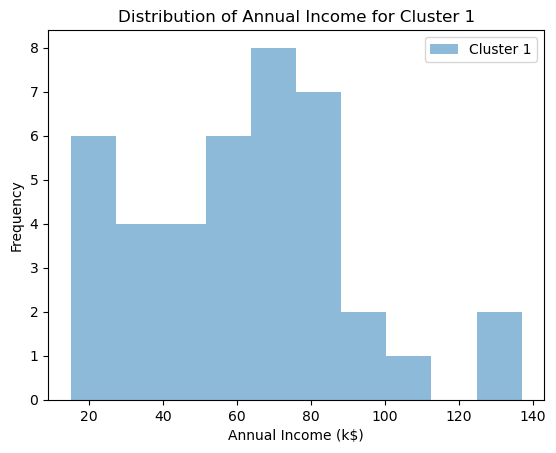

------------------------------------------------------
Cluster 2 statistics:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    43.0  43.000000           43.000000               43.000000     43.0
mean      1.0  48.720930           46.186047               39.674419      2.0
std       0.0  10.746706           16.096814               15.248296      0.0
min       1.0  20.000000           16.000000                5.000000      2.0
25%       1.0  42.500000           35.500000               33.500000      2.0
50%       1.0  49.000000           48.000000               43.000000      2.0
75%       1.0  54.500000           59.500000               50.000000      2.0
max       1.0  68.000000           79.000000               59.000000      2.0


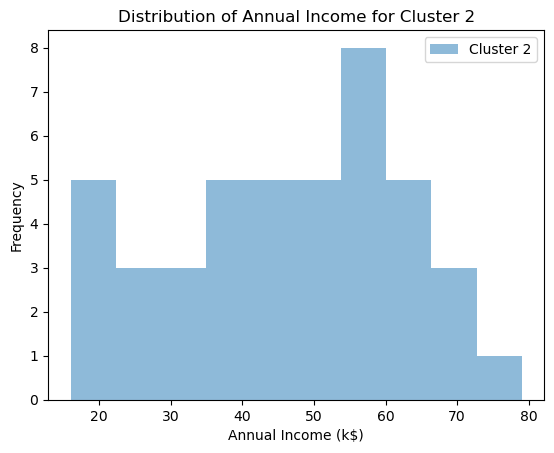

------------------------------------------------------
Cluster 0 statistics:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    55.0  55.000000           55.000000               55.000000     55.0
mean      1.0  28.345455           60.800000               68.654545      0.0
std       0.0   5.571815           26.155093               18.323450      0.0
min       1.0  18.000000           16.000000               29.000000      0.0
25%       1.0  23.000000           39.500000               53.000000      0.0
50%       1.0  29.000000           63.000000               73.000000      0.0
75%       1.0  32.000000           78.000000               84.000000      0.0
max       1.0  40.000000          120.000000               99.000000      0.0


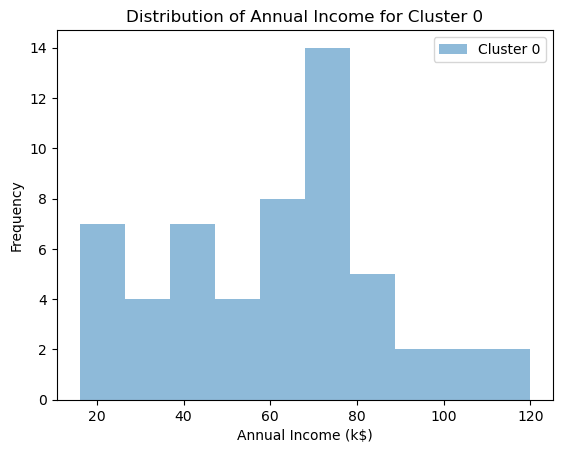

------------------------------------------------------
Cluster 3 statistics:
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count    31.0  31.000000           31.000000               31.000000     31.0
mean      0.0  55.903226           48.774194               38.806452      3.0
std       0.0  10.199199           16.368078               16.996900      0.0
min       0.0  35.000000           19.000000                3.000000      3.0
25%       0.0  48.000000           41.000000               35.000000      3.0
50%       0.0  57.000000           54.000000               46.000000      3.0
75%       0.0  65.500000           62.000000               50.000000      3.0
max       0.0  70.000000           77.000000               60.000000      3.0


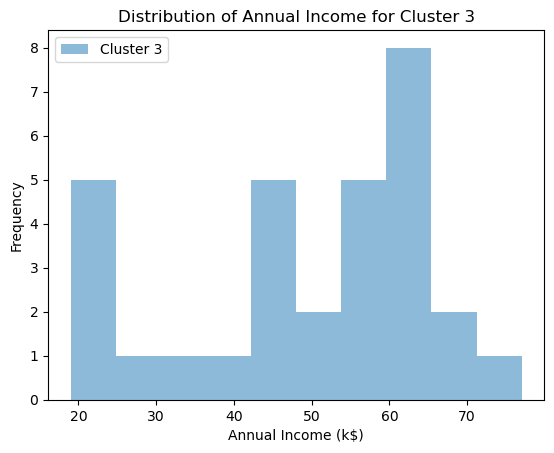

------------------------------------------------------
Cluster 4 statistics:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  31.000000  31.000000           31.000000               31.000000   
mean    0.451613  40.419355           90.000000               15.741935   
std     0.505879  10.710662           16.538843                9.044216   
min     0.000000  19.000000           71.000000                1.000000   
25%     0.000000  34.000000           78.000000                9.500000   
50%     0.000000  41.000000           87.000000               15.000000   
75%     1.000000  47.000000           98.500000               21.000000   
max     1.000000  59.000000          137.000000               39.000000   

       Cluster  
count     31.0  
mean       4.0  
std        0.0  
min        4.0  
25%        4.0  
50%        4.0  
75%        4.0  
max        4.0  


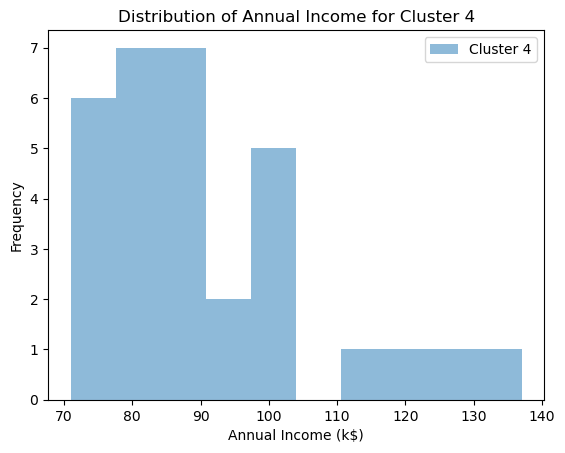

------------------------------------------------------


In [18]:
# Step 12: Explore cluster-specific insights

# Identify unique clusters
unique_clusters = data['Cluster'].unique()

# Perform cluster-specific analysis
for cluster in unique_clusters:
    cluster_data = data[data['Cluster'] == cluster]
    
    # Explore cluster-specific statistics
    cluster_stats = cluster_data.describe()
    print("Cluster", cluster, "statistics:")
    print(cluster_stats)
    
    # Visualize cluster-specific distribution
    plt.hist(cluster_data['Annual Income (k$)'], bins=10, alpha=0.5, label='Cluster ' + str(cluster))
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Annual Income for Cluster ' + str(cluster))
    plt.legend()
    plt.show()
    
    print("------------------------------------------------------")

In [19]:
print("Thank you🙏")

Thank you🙏
